In [1]:
import random
import re
import collections
import math
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_observations(filename):

    pattern = re.compile(r'''
    \s*(?P<object_id>\d+),            # object_id (first number)
    \s*(?P<within_frame_id>\d+),       # within_frame_id (second number)
    \s*'(?P<file_path>[^']+)',              # file path (file location)
    \s*cX\s*=\s*(?P<x>\d+),                 # cX coordinate
    \s*cY\s*=\s*(?P<y>\d+),                 # cY coordinate
    \s*Frame\s*=\s*(?P<frame>\d+)           # Frame number
''', re.VERBOSE)
    
    observations = collections.defaultdict(list)    
    with open(filename) as object_xys:
        for line in object_xys:
            m = pattern.match(line)
            if m:
                obj_id = int(m.group('object_id'))
                frame = m.group('frame')
                cX=m.group('x')
                cY=m.group('y')
                
                observations[int(m.group('object_id'))].append((int(m.group('frame')), int(m.group('x')), int(m.group('y'))))
                
    return observations

In [3]:
dead_obs = load_observations('ObjectXYs.txt')
print(dead_obs)

defaultdict(<class 'list'>, {1: [(150, 1028, 980), (151, 1158, 980), (152, 1287, 979), (153, 1415, 979), (154, 1542, 979), (155, 1668, 978), (156, 1793, 979), (157, 1916, 978), (158, 2040, 978), (159, 2162, 977), (160, 2284, 977), (161, 2405, 976), (162, 2526, 976), (163, 2645, 976), (164, 2763, 975), (165, 2881, 974), (166, 2998, 974), (167, 3114, 973), (168, 3230, 973), (169, 3343, 971), (170, 3455, 968), (171, 3567, 964), (172, 3680, 954), (173, 3800, 944), (174, 3921, 936), (175, 4046, 931)], 2: [(150, 1550, 1602), (151, 1682, 1603), (152, 1813, 1604), (153, 1945, 1605), (154, 2076, 1606), (155, 2206, 1607), (156, 2336, 1607), (157, 2465, 1610), (158, 2593, 1610), (159, 2720, 1611), (160, 2848, 1611), (161, 2975, 1613), (162, 3103, 1615), (163, 3231, 1616), (164, 3357, 1620), (165, 3485, 1624), (166, 3613, 1628), (167, 3743, 1631), (168, 3877, 1634), (169, 4010, 1635)], 3: [(158, 222, 933), (159, 325, 932), (160, 424, 932), (161, 523, 931), (162, 621, 931), (163, 718, 931), (164, 8

In [47]:
def grid_by_grid_displacement_observation(pseudo_obs): 
    MAX_X=2000
    MAX_Y=4000
    
    GRID_SQUARES = 5

    grid_obs = [[[] for _ in range(GRID_SQUARES)] for _ in range(GRID_SQUARES)]
    #obj_grid_obs = [[[] for _ in range(GRID_SQUARES)] for _ in range(GRID_SQUARES)]

    #print(grid_obs)

    for obj_id, obs in pseudo_obs.items():
        grid_cells_visited = set()
        for j in range(len(obs)-1):
            x1=obs[j][1]
            y1=obs[j][2]
            x2=obs[j+1][1]
            y2=obs[j+1][2]

            x1_frame=obs[j][0]
            x2_frame=obs[j+1][0]
            
            x1_row=math.floor(x1/4000*GRID_SQUARES)
            y1_col=math.floor(y1/2000*GRID_SQUARES)

            x2_row=math.floor(x2/4000*GRID_SQUARES)
            y2_col=math.floor(y2/2000*GRID_SQUARES)

            if(0<= x1_row <GRID_SQUARES and 0<= y1_col <GRID_SQUARES):
                grid_pos=grid_obs[x1_row][y1_col]
                #obj_grid_pos=obj_grid_obs[x1_row][y1_col]

                if(x1_frame==(x2_frame+1)):
                    dx=x2-x1
                    dy=y2-y1
                    grid_pos.append((dx,dy))
                    #obj_grid_pos.append((obj_id,dx, dy))
                
                else:
                    frame_distance=x2_frame-x1_frame 
                    if (frame_distance!=0):
                        dx=(x2-x1)/frame_distance
                        dy=(y2-y1)/frame_distance
                        grid_pos.append((dx,dy))
                        #obj_grid_pos.append((obj_id,dx, dy))
               
    return grid_obs

In [48]:
dead_grid_displacements=grid_by_grid_displacement_observation(dead_obs)
print(dead_grid_displacements)

[[[(115.0, -1.0), (114.0, -1.0), (113.0, -2.0), (111.0, -1.0), (110.0, -2.0), (110.0, 0.0), (109.0, -1.0), (107.0, -1.0), (105.0, -2.0), (105.0, -1.0), (103.0, -1.0), (104.0, 0.0), (73.0, 0.0), (74.0, -1.0), (74.0, -1.0), (74.0, -1.0), (71.0, 1.0), (72.0, 0.0), (72.0, 0.0), (59.0, -3.0), (58.0, -1.0), (61.0, -2.0), (57.0, 0.0), (56.0, 1.0), (58.5, 0.0), (61.0, 0.0), (58.0, 0.0), (58.0, 0.0), (43.0, -1.0), (42.0, 0.0), (44.0, 1.0), (40.0, -2.0), (40.0, 0.0), (41.0, 0.0), (42.0, 0.0), (42.0, 0.0), (40.0, 0.0), (41.0, 0.0), (41.0, 0.0), (41.0, -1.0), (40.0, 1.0), (40.0, 0.0), (57.0, 1.0), (57.0, 0.0), (58.0, -1.0), (56.0, -1.0), (61.0, 0.0), (58.0, 2.0), (55.0, -1.0), (56.0, 0.0), (55.0, -1.0), (55.0, 1.0), (103.0, 0.0), (98.0, -2.0), (99.0, 0.0), (99.0, -1.0), (97.0, 0.0), (98.0, -1.0), (78.0, -1.0), (77.0, 0.0), (76.0, -1.0), (74.0, 0.0), (72.0, 0.0), (73.0, 0.0), (72.0, 1.0), (45.0, -1.0), (45.0, 0.0), (46.0, -1.0), (44.666666666666664, 0.0), (44.0, 0.0), (43.0, 0.0), (41.0, 0.0), (40.

In [49]:
'''
sorted_dead_obj_grid_stats = [
    [sorted(inner_list, key=lambda x: x[0]) if inner_list else inner_list for inner_list in sublist]
    for sublist in dead_obj_grid_stats
]
print(sorted_dead_obj_grid_stats)
'''

'\nsorted_dead_obj_grid_stats = [\n    [sorted(inner_list, key=lambda x: x[0]) if inner_list else inner_list for inner_list in sublist]\n    for sublist in dead_obj_grid_stats\n]\nprint(sorted_dead_obj_grid_stats)\n'

In [50]:
def grid_covariance_calculate(grid_displacements):
    covar=[]
    GRID_SQUARES = 5
    grid_stats = [[None for _ in range(GRID_SQUARES)] for _ in range(GRID_SQUARES)]
    
    for i in range(GRID_SQUARES):
        for j in range(GRID_SQUARES):
            if(len(grid_displacements[i][j])>1):
                dxdy_items = np.array(grid_displacements[i][j])
                #print(f" for {i,j} cell displacements are {dxdy_items}, {dxdy_items.shape}")
                #print(f" at {i,j} cell")
                mu = np.mean(dxdy_items, axis=0)
                #print(mu,mu.shape)
                
                cov_matrix = np.cov(dxdy_items.T)
                #print(cov_matrix,cov_matrix.shape)
                
            grid_stats[i][j] = {
                'mu': mu,
                'cov_matrix': cov_matrix
        }
                      
    #print(grid_stats)
    return grid_stats 

In [51]:
def print_grid_stats(grid_stat):
    for i, row_item in enumerate(grid_stat):
        for j, col_item in enumerate(row_item):
            mu=col_item['mu']
            cov_matrix=col_item['cov_matrix']
            print(f"grid[{i}][{j}]: ")               
            print(f"    mu: {mu}")              
            print(f"    cov_matrix:\n{cov_matrix}")

In [15]:
dead_grid_stats=grid_covariance_calculate(dead_grid_displacements)
print_grid_stats(dead_grid_stats)

grid[0][0]: 
    mu: [53.34848485 -1.20661157]
    cov_matrix:
[[993.9          4.11565657]
 [  4.11565657   6.31528926]]
grid[0][1]: 
    mu: [85.7519084  -2.41984733]
    cov_matrix:
[[ 9.11786054e+02 -4.62654140e-01]
 [-4.62654140e-01  6.20146800e+01]]
grid[0][2]: 
    mu: [95.38239875 -1.78660436]
    cov_matrix:
[[688.5505704   35.65753884]
 [ 35.65753884 110.79077274]]
grid[0][3]: 
    mu: [ 8.48592593e+01 -7.40740741e-02]
    cov_matrix:
[[843.48004422  13.19845218]
 [ 13.19845218  24.56163626]]
grid[0][4]: 
    mu: [75.35031847 -0.80254777]
    cov_matrix:
[[763.11366977  93.88551364]
 [ 93.88551364  55.96717295]]
grid[1][0]: 
    mu: [59.57716049 -0.47839506]
    cov_matrix:
[[554.29369872  -5.40074573]
 [ -5.40074573  11.46692163]]
grid[1][1]: 
    mu: [84.44475138 -0.71270718]
    cov_matrix:
[[750.8135973    3.21040516]
 [  3.21040516   3.18367096]]
grid[1][2]: 
    mu: [90.5617284  -1.20987654]
    cov_matrix:
[[564.39678706  39.76458861]
 [ 39.76458861  20.47741738]]
grid

In [17]:
def calculate_pdf_obj(curr_obj_pos,mu,cov_matrix):
    pdfs_for_obj=[]    
    for point_to_evaluate in curr_obj_pos:
        #print(point_to_evaluate)
        #pdf_value = round(multivariate_normal.pdf(point_to_evaluate, mean=mu, cov=cov_matrix),4)
        pdf_value = multivariate_normal.pdf(point_to_evaluate, mean=mu, cov=cov_matrix)
        #print(f"pdfs are: {pdf_value}")
        pdfs_for_obj.append(pdf_value)
    return pdfs_for_obj

In [23]:
def grid_by_grid_pdf(grid_stat, sorted_obj_grid_stats,obj_id):
    pdfs_for_cells=[]
    for i, (stats, obj_dis) in enumerate(zip(grid_stat, sorted_obj_grid_stats)):
        for j, (stat_val, obj_pos) in enumerate(zip(stats, obj_dis)):
            mu=stat_val['mu']
            cov_matrix=stat_val['cov_matrix']
            curr_obj_dis_cord=[item[1:] for item in obj_pos if item[0] == obj_id]
            #curr_obj_cord=[grid_item[1:] for grid_item in obj_grid_cordinates if grid_item[0] == obj_id]
                
            #print(f"at grid [{i}][{j}]")
            '''
            print(f"    mu: {mu}")              
            print(f"    cov_matrix:\n{cov_matrix}")
            print(f"    original cordinates:\n{curr_obj_cord}")
            '''
            #print(f" displacements are: {curr_obj_dis_cord}")
            
            if(len(curr_obj_dis_cord)>0):
                pdfs=calculate_pdf_obj(curr_obj_dis_cord,mu,cov_matrix)
                pdfs_for_cells.append(pdfs)
                #print(pdfs)
            '''
            else:
                #curr_obj_dis_cord.append([])
                pdfs_for_cells.append([])
                #print(curr_obj_cord)
            '''
        #print(pdfs_for_cells)
        #reshaped_pdf_values = [pdfs_for_cells[k:k + 5] for k in range(0, len(pdfs_for_cells), 5)]
        #print([pdfs_for_cells[k:k + 5] for k in range(0, len(pdfs_for_cells), 5)])
    just_pdfs=[pdfs for sublist in pdfs_for_cells for pdfs in sublist]
    return just_pdfs

In [25]:
dead_pdfs_one=grid_by_grid_pdf(dead_grid_stats, sorted_dead_obj_grid_stats,1)
print(dead_pdfs_one)

[0.00037470204959382756, 0.0003607489281367405, 0.0004345389323942125, 0.00046651201534872986, 0.000451752652930225, 0.00021146476993923346, 0.00025257354551154275, 0.0002328797946220405, 0.0002723444695337242, 0.000270960023478037, 0.00029298548699063434, 0.000471964319973383, 0.0005546826678898779, 0.0005859039657733357, 0.0005859039657733357, 0.0006458402973642575, 0.0006816504021668515, 0.0006944561521293296, 0.00036160865656746036, 0.0004162708664314826, 0.000434155563028374, 0.0002790002627680271, 0.00018289435101296515, 0.00021215961931029826, 0.0001673883200106909]


In [27]:
i=0
dead_pdfs_all=[]
for obj_key in dead_obs:
    #print(f"for object no {obj_key}")
    dead_pdfs=grid_by_grid_pdf(dead_grid_stats, sorted_dead_obj_grid_stats,obj_key)
    #print(f"dead pdfs are: {dead_pdfs}")
    if dead_pdfs:
        dead_pdfs_all.extend(dead_pdfs)
    #print(dead_pdfs_all)
    i+=1
    if i==131:
        break
print(len(dead_pdfs_all))
dead_pdfs_all = [math.log(p) for p in dead_pdfs_all]
num_unique_elements = len(set(dead_pdfs_all))
print(num_unique_elements)
print(dead_pdfs_all)

4260
3095
[-7.889379382220085, -7.927328331522634, -7.741225014524439, -7.67022678163401, -7.702375755946424, -8.461452145743994, -8.283808082306898, -8.364988140431965, -8.208442860807727, -8.21353926280715, -8.135387482629152, -7.6586071685127655, -7.497114377308181, -7.442354662750083, -7.442354662750083, -7.3449583024473935, -7.290993638342063, -7.272381533645924, -7.924947990110399, -7.784174388360942, -7.742107647930652, -8.184297834322466, -8.606601888703446, -8.458171645320299, -8.695194175278084, -8.467055915054313, -7.9602632285255766, -8.034698302485724, -7.9602632285255766, -7.887142475058418, -7.719761986646315, -9.013677064182412, -7.900660939501114, -7.718416511214196, -7.900660939501114, -8.002497728370862, -8.082292920302132, -7.801623636401415, -8.679195024604663, -8.900866054980368, -8.900866054980368, -8.622476050019344, -9.160585344865062, -9.150200245923546, -7.493432694179409, -7.471830973390856, -7.461740836216082, -7.468075713338513, -7.465797395973489, -7.4718

In [45]:
def grid_by_grid_pdf_one(grid_stat, current_obj_dis):
    pdfs_for_cells=[]
    for i, (stats, obj_dis) in enumerate(zip(grid_stat,current_obj_dis)):
        for j, (stat_val,obj_pos) in enumerate(zip(stats, obj_dis)):
            mu=stat_val['mu']
            cov_matrix=stat_val['cov_matrix']
            curr_obj_dis_cord=obj_pos if obj_pos else []
            '''   
            print(f"at grid [{i}][{j}]")
            print(f"    mu: {mu}")              
            print(f"    cov_matrix:\n{cov_matrix}")
            print(f"    original cordinates:\n{curr_obj_dis_cord}")
            
            #print(f" displacements are: {curr_obj_dis_cord}")
            '''
            if(len(curr_obj_dis_cord)>0):
                pdfs=calculate_pdf_obj(curr_obj_dis_cord,mu,cov_matrix)
                pdfs_for_cells.append(pdfs)
                #print(pdfs)
    just_pdfs=[pdfs for sublist in pdfs_for_cells for pdfs in sublist]
    return just_pdfs

In [55]:
dead_pdf_all_dict={}
for obj_id,obj_cord_list in dead_obs.items():
    current_item_dict = {obj_id: obj_cord_list}
    #print(current_item_dict)
    curr_obj_dis=grid_by_grid_displacement_observation(current_item_dict)
    #print(curr_obj_dis)
    pdfs_by_grid=grid_by_grid_pdf_one(dead_grid_stats, curr_obj_dis)
    dead_pdf_all_dict[obj_id]= pdfs_by_grid
    #print(pdfs_by_grid)
print(dead_pdf_all_dict)

{1: [0.00037470204959382756, 0.0003607489281367405, 0.0004345389323942125, 0.00046651201534872986, 0.000451752652930225, 0.00021146476993923346, 0.00025257354551154275, 0.0002328797946220405, 0.0002723444695337242, 0.000270960023478037, 0.00029298548699063434, 0.000471964319973383, 0.0005546826678898779, 0.0005859039657733357, 0.0005859039657733357, 0.0006458402973642575, 0.0006816504021668515, 0.0006944561521293296, 0.00036160865656746036, 0.0004162708664314826, 0.000434155563028374, 0.0002790002627680271, 0.00018289435101296515, 0.00021215961931029826, 0.0001673883200106909], 2: [0.00021028308419069605, 0.0003490612224947357, 0.0003240222724238264, 0.0003490612224947357, 0.0003755411614498228, 0.0004439662612272058, 0.0001217334104793207, 0.00037049858236857267, 0.000444564008961647, 0.00037049858236857267, 0.00033462577892521915, 0.0003089617978378903, 0.00040907025813149284, 0.0001700879291045378, 0.00013627085730754285, 0.00013627085730754285, 0.00018001397881261923, 0.00010510135

In [56]:
alive_obs = load_observations('AliveObjectXYs.txt')
print(alive_obs)

defaultdict(<class 'list'>, {1: [(152, 58, 86), (153, 189, 85), (154, 315, 85), (155, 437, 85), (156, 557, 84), (157, 677, 83), (158, 796, 84), (159, 913, 85), (160, 1031, 86), (161, 1148, 87), (162, 1265, 88), (163, 1381, 90), (164, 1497, 91), (165, 1613, 93), (166, 1727, 94), (167, 1842, 96), (168, 1957, 99), (169, 2073, 99), (170, 2187, 99), (171, 2300, 98), (172, 2412, 97), (173, 2523, 96), (174, 2632, 95), (175, 2743, 95), (176, 2853, 94), (177, 2963, 94), (178, 3072, 94), (179, 3183, 95), (180, 3293, 95), (181, 3402, 94), (182, 3513, 94), (183, 3622, 94), (184, 3732, 93), (185, 3839, 95), (186, 3948, 96), (187, 4056, 97)], 2: [(165, 235, 501), (166, 364, 500), (167, 487, 501), (168, 608, 502), (169, 725, 503), (170, 840, 504), (171, 954, 505), (172, 1066, 508), (173, 1177, 510), (174, 1286, 510), (175, 1395, 513), (176, 1502, 515), (177, 1607, 516), (178, 1711, 518), (179, 1816, 520), (180, 1919, 521), (181, 2020, 522), (182, 2122, 523), (183, 2223, 524), (184, 2322, 525), (185, 

In [58]:
alive_pdf_all_dict={}
for obj_id,obj_cord_list in alive_obs.items():
    current_item_dict = {obj_id: obj_cord_list}
    #print(current_item_dict)
    curr_obj_dis=grid_by_grid_displacement_observation(current_item_dict)
    #print(curr_obj_dis)
    pdfs_by_grid=grid_by_grid_pdf_one(dead_grid_stats, curr_obj_dis)
    alive_pdf_all_dict[obj_id]= pdfs_by_grid
    #print(pdfs_by_grid)
print(alive_pdf_all_dict)

{1: [9.67614111810766e-05, 0.00013245332695145407, 0.00017559268559685015, 0.00021517519311484317, 0.00021517519311484317, 0.00017092491446351766, 0.00019417725888786215, 7.661470922129169e-05, 8.520254396545184e-05, 8.520254396545184e-05, 7.579038309265194e-05, 9.45814231953977e-05, 7.579038309265194e-05, 0.000216816511882713, 0.00012825964491180176, 6.476923389598426e-05, 0.00020710680066859198, 0.00025548379819830046, 0.00025737100156788514, 0.0002849140857730499, 0.00047753849664093477, 0.000587850925040924, 0.0004574982361401906, 0.0005304269234981141, 0.0005081827057904232, 0.0005632157777160291, 0.00021938900324696358, 0.0005081827057904232, 0.00027478386053117454, 0.0003496164485362694, 0.00043616322981643746, 0.0002458747547003247, 0.0004112551758040932, 0.00046608375162868345, 0.0005177437470784976], 2: [0.00023599462021262397, 0.0002843144865667932, 0.00030786067249413495, 0.0003562451005519645, 0.0003807048080032914, 0.0012260634228892736, 0.0002562511079196209, 0.000702756

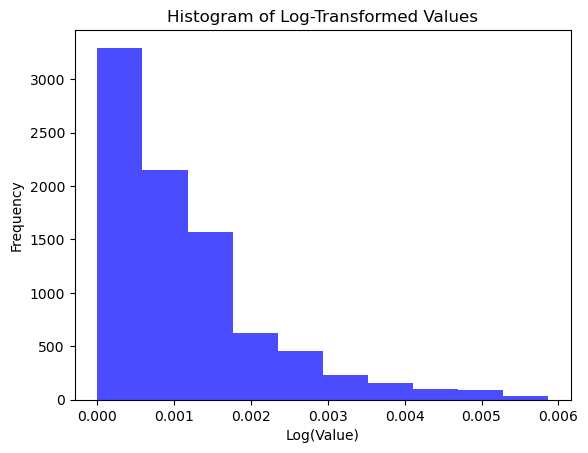

In [65]:
plt.hist(pdfs_for_all, bins=no_of_bins, edgecolor='black')  # 'bins' sets the number of bins
plt.xlabel('Log of Pdf Value')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {type_of_obj} Pdfs")
    plt.show()